# Inteligencia Artificial
# Clase 13 - Deep Learning para Computer Vision 1

## Introducción a ConvNets con Keras

En esta notebook, vamos a desarrollar nuestra primera red neuronal convolucional con Keras y la aplicaremos al dataset MNIST para ver si podemos mejorar los resultados que ya habíamos alcanzado con las redes *fully - connected* (~98% de accuracy en test). Veremos que el código para construir este otro tipo de arquitectura con el modelo secuencial no será muy distinto a lo que ya conocemos. La novedad será que ahora vamos a trabajar con otro tipo de capas, en particular, las `Conv2D`, `MaxPooling2D` (o `AveragePooling2D`), que podremos importar del módulo de `layers`.

In [0]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Nuestro modelo se compondrá por una primera capa convolucional que aprenderá 32 filtros distintos para generarar 32 *feature maps* de salida. Luego de esta capa convolucional, haremos *downsampling* con una capa de Max Pooling que reducirá las dimensiones espaciales de la salida a la mitad. Luego, sumaremos otra capa convolucional que aprenderá 64 filtros y acto seguido, también haremos *downsampling* con Max Pooling. Por último, agregaremos una tercera capa convolucional, también de 64 filtros pero sin *pooling* esta vez. En todos los casos, trabajaremos con *kernels* de 3x3 y activaremos nuestras capas con ReLU.

In [0]:
# Instanciamos un modelo secuencial
model = Sequential()

# Añadimos una primera capa convolucional 2D
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 # El input shape debe ser 3D
                 input_shape=(28, 28, 1))) 
# Añadimos una capa de Max Pooling 2D
model.add(MaxPooling2D(pool_size=(2, 2)))

# Añadimos una segunda capa convolucional 2D
model.add(Conv2D(64, (3, 3), activation='relu'))
# Añadimos una capa de Max Pooling 2D
model.add(MaxPooling2D((2, 2)))

# Añadimos una tercera capa convolucional 2D
model.add(Conv2D(64, (3, 3), activation='relu'))

Vemos como va quedando la arquitectura de la *convnet*:

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Estas capas van a encargarse de extraer *features* locales a partir de las imágenes de entrada que sean relevantes a los fines de la clasificación. Para terminar de construir un clasificador, deberemos incorporar capas densas, tal como veníamos haciendo hasta el momento:

In [0]:
# Primero, debemos aplanar la salida tridimensional de la última capa convolucional
model.add(Flatten())
# Sumamos una capa densa de 64 neuronas
model.add(Dense(64, activation='relu'))
# Definimos la capa de salida con una capa densa de 10 neuronas, activadas con softmax
model.add(Dense(10, activation='softmax'))

Veamos como queda la red final:

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Arriba se puede ver que las salidas de forma `(3, 3, 64)` se aplanaron en vectores de forma `(576,)`, antes de pasar por las *layers* de tipo `Dense`.

Pasamos a entrenar la red en el dataset MNIST:

In [0]:
# Cargamos el dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
# Preprocesamos los datos
from tensorflow.keras.utils import to_categorical

# Debemos hacer un reshape que agregue una nueva dimensión
# porque la capa convolucional espera que cada input individual sea 3D
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Entrenamos
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1789 - accuracy: 0.9453
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0499 - accuracy: 0.9843
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0278 - accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0224 - accuracy: 0.9927


Finalmente evaluamos el modelo:

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0267 - accuracy: 0.9910


In [0]:
test_acc

0.9909999966621399

¡Logramos un accuracy en test por encima del 99%! En términos relativos, esto representa un gran avance con respecto al modelo *fully - connected* que ya habíamos aplicado sobre el mismo dataset. Observemos algunas de las confusiones de nuestro modelo convolucional:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


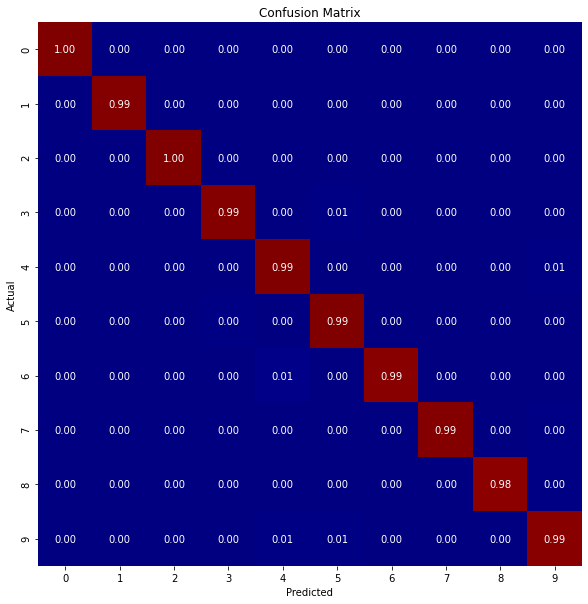

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generamos las etiquetas predichas por nuestra red
y_pred = model.predict(test_images)
test_pred = np.argmax(y_pred, axis=1)
test_labels_ = np.argmax(test_labels, axis=1)
    
# Confusion Matrix
fig, ax = plt.subplots(figsize=(10,10))
conf_matrix = confusion_matrix(test_labels_, test_pred)
conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)

sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False, 
            cmap=plt.cm.jet, ax=ax)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()

print('Classification Report:')
print(classification_report(test_labels_, test_pred))

In [0]:
missclassified = test_labels_ != test_pred
missclassified

array([False, False, False, ..., False, False, False])

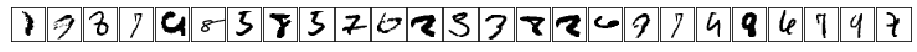

In [0]:
# Visualizamos algunas de las imágenes contenidas en el dataset
fig = plt.figure(figsize=(14, 14))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Graficamos algunos dígitos que no fueron bien predichos
missclassified = test_images[test_labels_ != test_pred]
for i, j in enumerate(np.random.choice(missclassified.shape[0], 25)):
    ax = fig.add_subplot(28, 28, i + 1, xticks=[], yticks=[])
    ax.imshow(missclassified[j].reshape((28,28)), cmap=plt.cm.binary,
              interpolation='nearest')

Podemos observar que varios de estos dígitos resultan difíciles de etiquetar incluso para las personas.

## Conclusiones

Vimos como desarrollar una red neuronal convolucional con Keras, trabajando con las capas `Conv2D` y `MaxPooling2D`. Incorporamos a la base convolucional algunas capas `Dense` para poder entrenar un clasificador de los dígitos del MNIST, que logró un *score* de generalización casi perfecto. Observamos que muchas de las confusiones del modelo serían perfectamente posibles incluso si una persona fuese quien estuviera etiquetando las imágenes. 